In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#q1
data = pd.read_csv('userbehaviour.csv')

print("Data:")
print(data.info())
print("\nNull Values:")
print(data.isnull().sum())
print("\nDescriptive Statistics:")
print(data.describe())



Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
None

Null Values:
userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status        

In [3]:

#q2
highest_time = max(data['Average Screen Time'])
lowest_time = min(data['Average Screen Time'])
average_time = sum(data['Average Screen Time']) / len(data['Average Screen Time'])

highest_time, 
lowest_time, 
average_time


(50.0, 0.0, 24.39039039039039)

In [4]:
#q3
highest_spent = max(data['Average Spent on App (INR)'])
lowest_spent = min(data['Average Spent on App (INR)'])
average_spent = sum(data['Average Spent on App (INR)']) / len(data['Average Spent on App (INR)'])

highest_spent, lowest_spent, average_spent


(998.0, 0.0, 424.4154154154154)

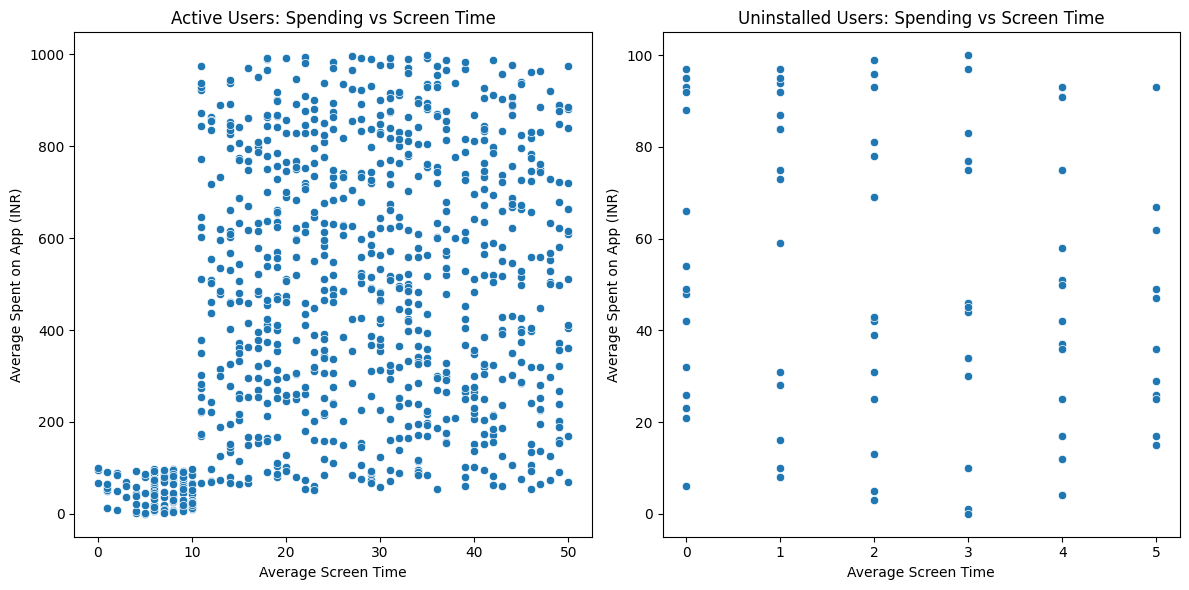

(                            Average Screen Time  Average Spent on App (INR)
 Average Screen Time                    1.000000                    0.337601
 Average Spent on App (INR)             0.337601                    1.000000,
                             Average Screen Time  Average Spent on App (INR)
 Average Screen Time                    1.000000                   -0.192659
 Average Spent on App (INR)            -0.192659                    1.000000)

In [5]:
#q4
active_users = data[data['Status'] == 'Installed']
uninstalled_users = data[data['Status'] == 'Uninstalled']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=active_users)
plt.title('Active Users: Spending vs Screen Time')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=uninstalled_users)
plt.title('Uninstalled Users: Spending vs Screen Time')

plt.tight_layout()
plt.show()


active_corr = active_users[['Average Screen Time', 'Average Spent on App (INR)']].corr()
uninstalled_corr = uninstalled_users[['Average Screen Time', 'Average Spent on App (INR)']].corr()

active_corr, uninstalled_corr


In [ ]:
#From the scatter plot, we observe that users who have uninstalled the app generally have lower average screen time and spending compared to active users. 
#This suggests that higher engagement and spending on the app are correlated with user retention. Users who spend more time and money on the app are more likely to remain active.

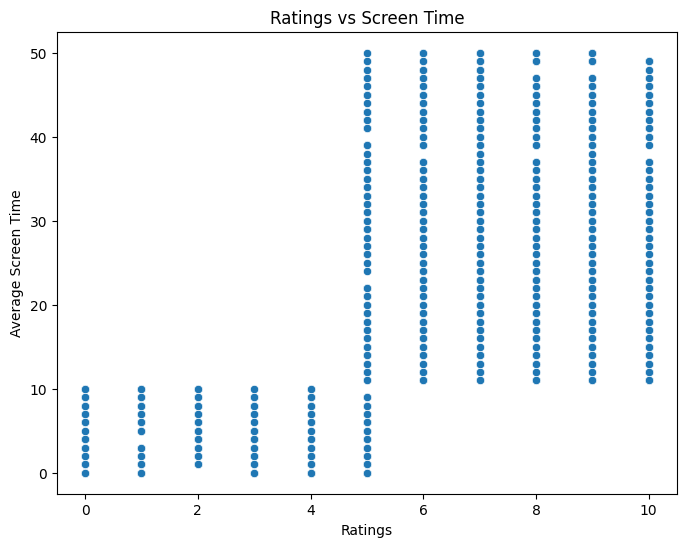

,Ratings,Average Screen Time
Ratings,1.000000,0.557624
Average Screen Time,0.557624,1.000000


In [6]:
#q5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Average Screen Time', data=data)
plt.title('Ratings vs Screen Time')
plt.show()

# Correlation analysis
ratings_corr = data[['Ratings', 'Average Screen Time']].corr()

ratings_corr

In [ ]:
#The scatter plot indicates that users who rate the app highly tend to have higher average screen times, irrespective of their status either active or uninstalled. 
#This implies that satisfied users, who rate the app positively, spend more time on it. This information can be used to target improvements and engage users who give lower ratings to increase their screen time.

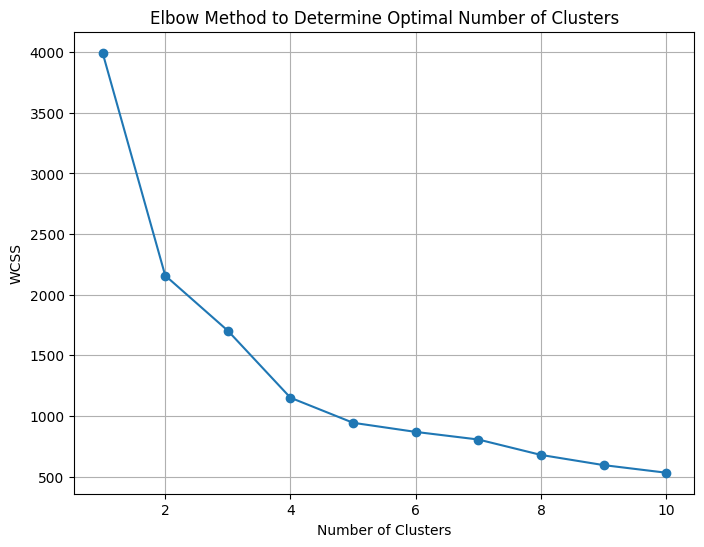

In [7]:
#q6
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)


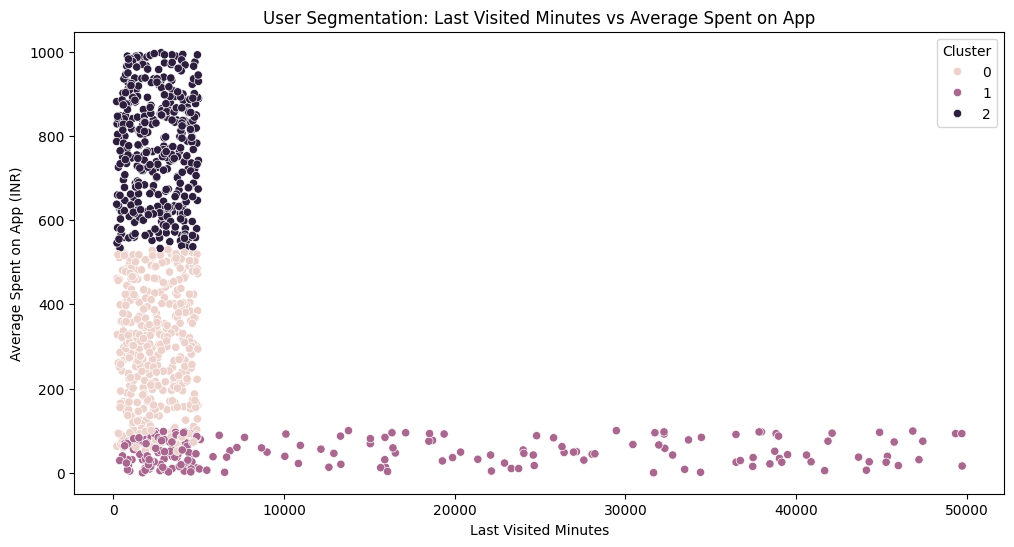

In [8]:
#q7
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Cluster', data=data)
plt.title('User Segmentation: Last Visited Minutes vs Average Spent on App')
plt.show()



In [35]:
#q8

#In this project, we performed various tasks to analyze and segment app user behavior. 
#1. We started by importing and cleaning the data, checking for null values, and understanding the basic statistics.
#2. We then analyzed screen time and spending patterns among users, comparing active and uninstalled users.
#3. Using K-means clustering, we segmented the users into distinct groups based on their behavior metrics.
#4. We analyzed the correlation between different metrics to understand their relationships.
#5. Finally, we used the Isolation Forest algorithm to detect anomalies in user behavior.

#The insights gained from this analysis can help in improving user engagement, targeting marketing efforts, and understanding user retention and churn patterns.


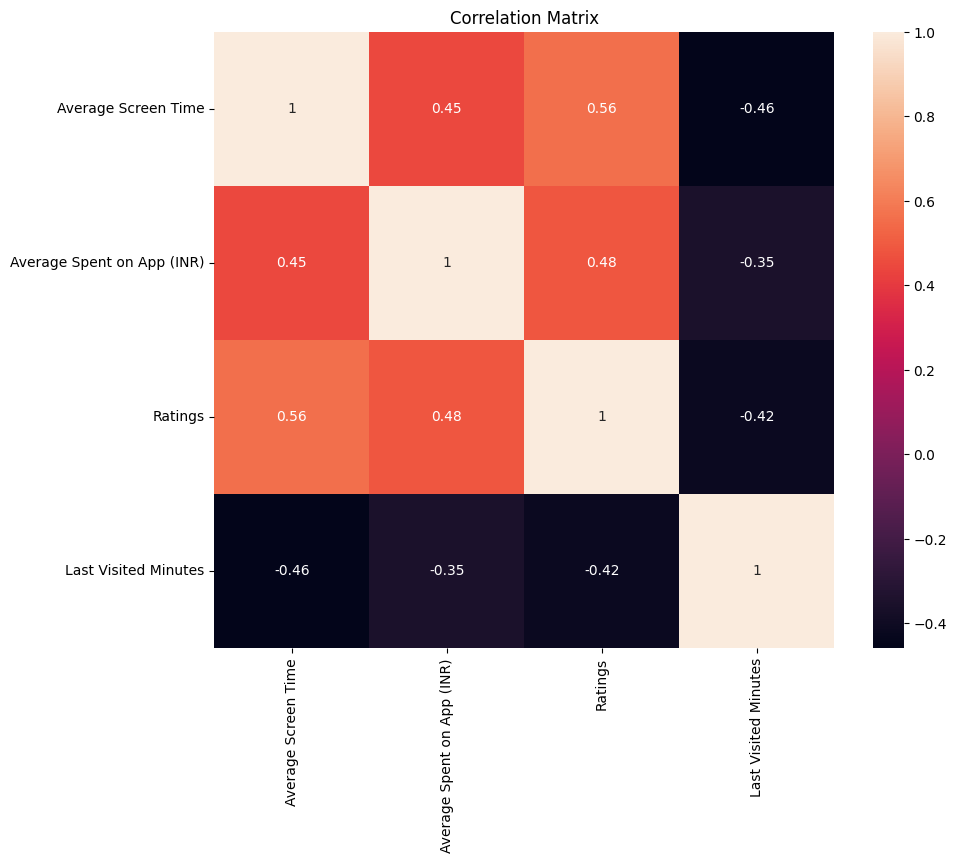

In [9]:
#q9
correlation_matrix = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True )
plt.title('Correlation Matrix')
plt.show()


In [11]:
#q10
from sklearn.ensemble import IsolationForest

features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Last Visited Minutes']]

iso_forest = IsolationForest(contamination=0.1, random_state=0)

anomaly_labels = iso_forest.fit_predict(features)

data['Anomaly'] = ['Normal' if label == 1 else 'Anomaly' for label in anomaly_labels]


In [12]:

data_with_anomalies = data[['userid', 'Average Screen Time', 'Average Spent on App (INR)', 'Last Visited Minutes', 'Anomaly']]
print(data_with_anomalies)

# saving data to a new file
data_with_anomalies.to_csv('anomalies.csv', index=False)


     userid  Average Screen Time  Average Spent on App (INR)  \
0      1001                 17.0                       634.0   
1      1002                  0.0                        54.0   
2      1003                 37.0                       207.0   
3      1004                 32.0                       445.0   
4      1005                 45.0                       427.0   
..      ...                  ...                         ...   
994    1995                 38.0                       938.0   
995    1996                 43.0                        61.0   
996    1997                 47.0                       761.0   
997    1998                  6.0                        73.0   
998    1999                  9.0                        54.0   

     Last Visited Minutes  Anomaly  
0                    2990   Normal  
1                   24008  Anomaly  
2                     971   Normal  
3                     799   Normal  
4                    3668   Normal  
..       